## Q2

b) Data Preparation
This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea.
i. Research what types of techniques are usually used for dealing with data with missing values.1 Pick at least one of them and apply it to this data in the next steps

In [2]:
import pandas as pd

trainData = pd.read_csv("aps_failure_training_set.csv")
testData = pd.read_csv("aps_failure_test_set.csv")
colnames = trainData.columns
print(trainData)
print(testData)

      class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
2       neg   41040     na         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874     na        1368    458      0      0      0      0   
5       neg   38312     na  2130706432    218      0      0      0      0   
6       neg      14      0           6     na      0      0      0      0   
7       neg  102960     na  2130706432    116      0      0      0      0   
8       neg   78696     na           0     na      0      0      0      0   
9       pos  153204      0         182     na      0      0      0      0   
10      neg   39196     na         204    170      0      0      0      0   
11      neg   45912     na           0    454      0      0      0      0   

In [6]:
import numpy
from sklearn.preprocessing import Imputer

trainLabels = pd.DataFrame()
testLabels = pd.DataFrame()

trainLabels["class"] = trainData["class"]
testLabels["class"] = testData["class"]

trainData = trainData.drop(["class"],axis=1)
testData = testData.drop(["class"],axis=1)

trainData = trainData.replace('na',numpy.NaN)
testData = testData.replace('na',numpy.NaN)

imputer=Imputer(missing_values='NaN', strategy='mean', axis=0)
imputer1 = imputer.fit(trainData)
imputer2 = imputer.fit(testData)

trainData=imputer1.transform(trainData)
testData = imputer2.transform(testData)

trainData = pd.DataFrame(trainData,
                      columns=colnames[1:])
testData = pd.DataFrame(testData,
                      columns=colnames[1:])

print(trainData)

         aa_000    ab_000        ac_000       ad_000  ae_000  af_000  ag_000  \
0       76698.0  0.772065  2.130706e+09   280.000000     0.0     0.0     0.0   
1       33058.0  0.772065  0.000000e+00   439.498794     0.0     0.0     0.0   
2       41040.0  0.772065  2.280000e+02   100.000000     0.0     0.0     0.0   
3          12.0  0.000000  7.000000e+01    66.000000     0.0    10.0     0.0   
4       60874.0  0.772065  1.368000e+03   458.000000     0.0     0.0     0.0   
5       38312.0  0.772065  2.130706e+09   218.000000     0.0     0.0     0.0   
6          14.0  0.000000  6.000000e+00   439.498794     0.0     0.0     0.0   
7      102960.0  0.772065  2.130706e+09   116.000000     0.0     0.0     0.0   
8       78696.0  0.772065  0.000000e+00   439.498794     0.0     0.0     0.0   
9      153204.0  0.000000  1.820000e+02   439.498794     0.0     0.0     0.0   
10      39196.0  0.772065  2.040000e+02   170.000000     0.0     0.0     0.0   
11      45912.0  0.772065  0.000000e+00 

ii. For each of the 170 features, calculate the coefficient of variation CV =s/m, where s is sample variance and m is sample mean.

In [247]:
CV = (trainData.std()/trainData.mean()*100).sort_values()
print(CV)

cd_000        0.000000
br_000       39.186426
bq_000       40.785608
bp_000       43.402450
bo_000       46.960595
bn_000       52.235421
bm_000       59.373635
bk_000       73.160745
bl_000       73.447743
ca_000       90.228337
cb_000       90.495325
bs_000      104.508343
dc_000      163.758356
cv_000      166.389825
cs_000      187.086707
dp_000      195.510555
do_000      209.459505
cs_006      212.818548
dt_000      214.022283
ac_000      216.908112
ce_000      217.371194
ab_000      218.911478
ed_000      221.155417
an_000      223.742352
ao_000      225.885285
ds_000      226.455812
bg_000      229.635516
ah_000      229.872366
cn_005      233.073486
ag_006      234.429311
              ...     
ag_009     3293.609748
dg_000     3323.362075
ay_004     3344.281864
ea_000     3350.880513
cn_009     3383.414743
dm_000     3394.892153
ag_001     3442.566213
dk_000     3579.881709
ay_000     3657.280912
dl_000     3694.784256
ay_002     3873.882662
eg_000     4029.601740
aj_000     

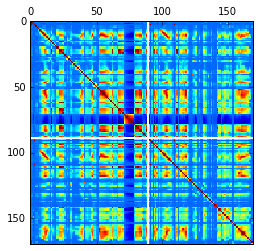

In [20]:
import matplotlib.pyplot as plt
corr = trainData.corr()
plt.matshow(trainData.corr())
plt.show()

In [57]:
print(corr)

          aa_000    ab_000    ac_000    ad_000    ae_000    af_000    ag_000  \
aa_000  1.000000  0.031188 -0.020530 -0.001589  0.046078  0.066500  0.018545   
ab_000  0.031188  1.000000 -0.010365  0.000033  0.028126  0.043179  0.000652   
ac_000 -0.020530 -0.010365  1.000000 -0.001881 -0.004944 -0.010269  0.017541   
ad_000 -0.001589  0.000033 -0.001881  1.000000 -0.000175 -0.000218 -0.000043   
ae_000  0.046078  0.028126 -0.004944 -0.000175  1.000000  0.823108 -0.000429   
af_000  0.066500  0.043179 -0.010269 -0.000218  0.823108  1.000000 -0.000534   
ag_000  0.018545  0.000652  0.017541 -0.000043 -0.000429 -0.000534  1.000000   
ag_001  0.142600  0.006870 -0.000731 -0.000118 -0.000617 -0.000763  0.165373   
ag_002  0.284732  0.022256 -0.009002 -0.000235  0.003156  0.006586  0.090567   
ag_003  0.493673  0.034700 -0.023432 -0.000476  0.024134  0.036970  0.032052   
ag_004  0.605412  0.033511 -0.033038 -0.000753  0.048778  0.073595  0.014210   
ag_005  0.778463  0.027551 -0.018530 -0.

Pick √170 features with highest CV , and make scatter plots and box plots
for them, similar to those on p. 129 of ISLR. Can you draw conclusions about
significance of those features, just by the scatter plots?

In [248]:
sortedList = CV.iloc[len(CV)-13:len(CV)].keys()
print(sortedList)

Index(['ch_000', 'au_000', 'ak_000', 'az_009', 'as_000', 'ay_009', 'ag_000',
       'dj_000', 'dh_000', 'cs_009', 'ad_000', 'co_000', 'cf_000'],
      dtype='object')


The above listed 13 features have highest cv value.

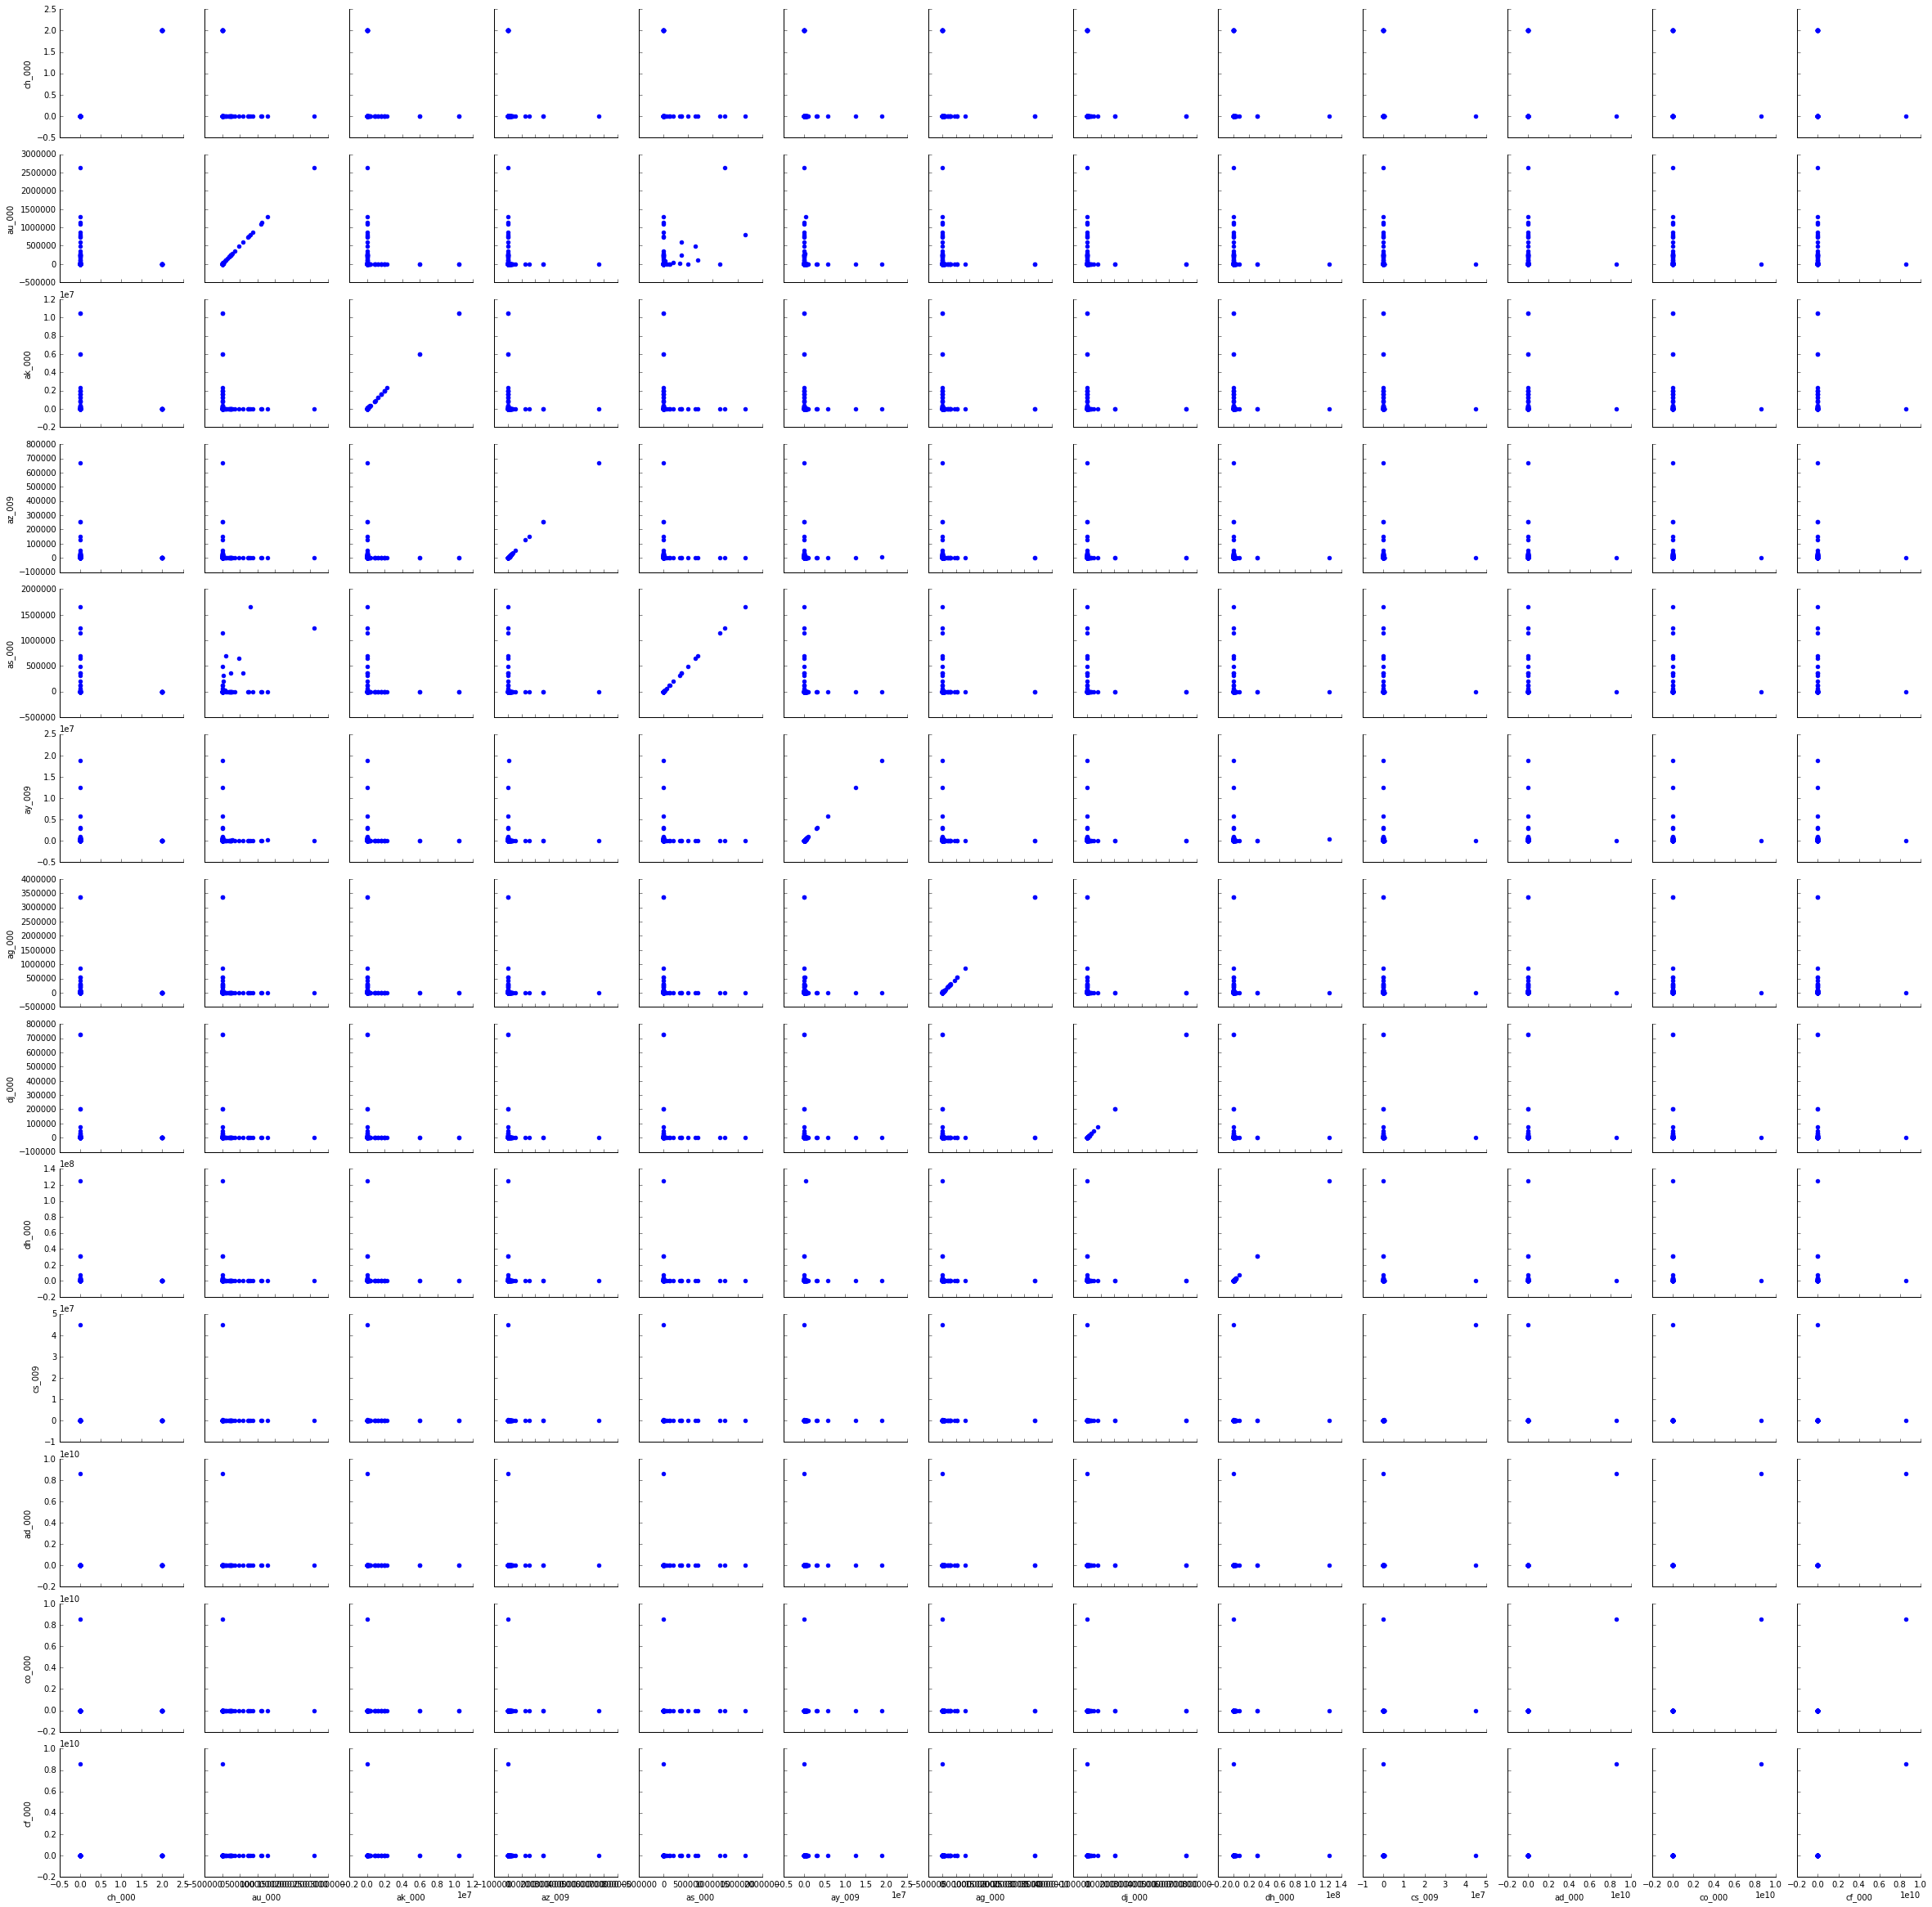

In [249]:
import seaborn as sns
g = sns.PairGrid(trainData[sortedList])
g = g.map(plt.scatter)
plt.show()

Most pairs do not show correlation. Hence the problems of multicollinearity are less probable to be posed in our problem.

v. Determine the number of positive and negative data. Is this data set imbalanced?

In [7]:
boolidx = trainLabels["class"]=="neg"
# print(boolidx)
trainLabels=trainLabels[:60000]
# print(trainLabels[:60000])
boolidx.index = trainLabels.index

In [251]:
print(trainLabels.ix[boolidx].count())

59000


/Users/ashvant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


The number of negative examples is 59,000 out of 60,000. This clearly shows a case of imbalance in the sample population which may also be evident in confusion matrix.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import warnings



In [9]:
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
trainLabels["class"] = pd.DataFrame(trainLabels[:60000])

trainLabels["class"]= trainLabels["class"].replace("neg",0)
trainLabels["class"]= trainLabels["class"].replace("pos",1)

testLabels["class"]= testLabels["class"].replace("neg",0)
testLabels["class"]= testLabels["class"].replace("pos",1)
Trlabels = pd.DataFrame()
Trlabels["class"] = trainLabels["class"]

classifier = RandomForestClassifier(n_estimators = 13,max_depth = 10,oob_score=True)
classifier.fit(trainData,Trlabels)
resultFrame = pd.DataFrame()

result = pd.DataFrame(classifier.predict_proba(trainData))
resultFrame["predicted"] = result.iloc[:,1]
resultFrame.index = trainLabels["class"].index
resultFrame["actual"] = Trlabels

/Users/ashvant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/ashvant/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/ashvant/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [10]:

resultFrame["score"] = resultFrame["predicted"]
mask1 = resultFrame["predicted"]>0.5
mask = resultFrame["predicted"]<=0.5
resultFrame.ix[mask1,"predicted"] = 1
resultFrame.ix[mask,"predicted"] = 0
print(resultFrame)

       predicted  actual     score
0            0.0       0  0.000810
1            0.0       0  0.000836
2            0.0       0  0.000836
3            0.0       0  0.000836
4            0.0       0  0.000836
5            0.0       0  0.000836
6            0.0       0  0.000836
7            0.0       0  0.001314
8            0.0       0  0.001463
9            0.0       1  0.231401
10           0.0       0  0.000836
11           0.0       0  0.000836
12           0.0       0  0.000836
13           0.0       0  0.001702
14           0.0       0  0.000836
15           0.0       0  0.000836
16           0.0       0  0.008486
17           0.0       0  0.000836
18           0.0       0  0.000836
19           0.0       0  0.000836
20           0.0       0  0.000836
21           0.0       0  0.000836
22           0.0       0  0.016852
23           1.0       1  0.801851
24           0.0       0  0.000836
25           0.0       0  0.000836
26           0.0       0  0.000836
27           0.0    

/Users/ashvant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


In [11]:
tn, fp, fn, tp = confusion_matrix(resultFrame["actual"],resultFrame["predicted"]).ravel()
print("\t\tConfusion Matrix")
print("True Positives : ",tp)
print("True Negatives : ",tn)
print("False Positives : ",fp)
print("False Negatives : ",fn)

		Confusion Matrix
True Positives :  815
True Negatives :  58995
False Positives :  5
False Negatives :  185


The ratio of False Negatives to true positives shows that there is a problem of imbalance which has to be handled.

In [12]:
misclassification = (fn+fp)/(tp+tn+fp+fn)
print(misclassification)

0.00316666666667


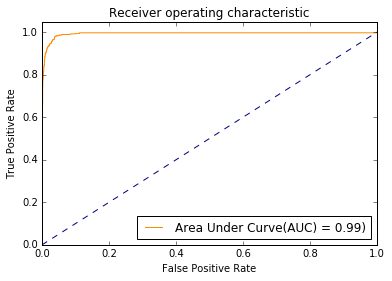

In [21]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0,2):
    fpr[i], tpr[i], _ = roc_curve(resultFrame["actual"], resultFrame["score"])
    roc_auc[i] = auc(fpr[i], tpr[i])

# fpr["micro"], tpr["micro"], _ = roc_curve(resultFrame["actual"].ravel(),  resultFrame["score"].ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 1
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='Area Under Curve(AUC) = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
Telabels  = pd.DataFrame()
Telabels["class"] = testLabels["class"]
resultFrame = pd.DataFrame()

result = pd.DataFrame(classifier.predict_proba(testData))
resultFrame["predicted"] = result.iloc[:,1]
resultFrame.index = Telabels["class"].index
resultFrame["actual"] = Telabels
resultFrame["score"] = resultFrame["predicted"]
mask1 = resultFrame["predicted"]>0.5
mask = resultFrame["predicted"]<=0.5
resultFrame.ix[mask1,"predicted"] = 1
resultFrame.ix[mask,"predicted"] = 0
print(resultFrame)

       predicted  actual     score
0            0.0       0  0.000836
1            0.0       0  0.000836
2            0.0       0  0.004425
3            0.0       0  0.000836
4            0.0       0  0.000836
5            0.0       0  0.000836
6            0.0       0  0.000836
7            0.0       0  0.001715
8            0.0       0  0.000836
9            0.0       0  0.000836
10           0.0       0  0.000836
11           0.0       0  0.000836
12           0.0       0  0.001463
13           0.0       0  0.000836
14           0.0       0  0.000836
15           0.0       0  0.000836
16           0.0       0  0.000836
17           0.0       0  0.000745
18           0.0       0  0.000836
19           0.0       0  0.000836
20           0.0       0  0.000836
21           0.0       0  0.000836
22           0.0       0  0.002795
23           0.0       0  0.000836
24           0.0       0  0.000836
25           0.0       0  0.000836
26           0.0       0  0.000836
27           0.0    

/Users/ashvant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':


In [23]:
tn, fp, fn, tp = confusion_matrix(resultFrame["actual"],resultFrame["predicted"]).ravel()
print("\t\tConfusion Matrix")
print("True Positives : ",tp)
print("True Negatives : ",tn)
print("False Positives : ",fp)
print("False Negatives : ",fn)

		Confusion Matrix
True Positives :  246
True Negatives :  15601
False Positives :  24
False Negatives :  129


In [24]:
misclassification = (fn+fp)/(tp+tn+fp+fn)
print(misclassification)

0.0095625


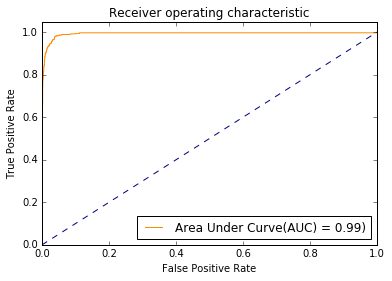

In [25]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0,2):
    fpr[i], tpr[i], _ = roc_curve(resultFrame["actual"], resultFrame["score"])
    roc_auc[i] = auc(fpr[i], tpr[i])

# fpr["micro"], tpr["micro"], _ = roc_curve(resultFrame["actual"].ravel(),  resultFrame["score"].ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 1
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='Area Under Curve(AUC) = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [26]:
print(1-classifier.oob_score_)

0.0086


The misclassification rate for test data is 0.0095625 and the OOB error is 0.0086 which shows that OOB error is an estimate of test error and since it is a byproduct of Random forest process no separate overhead of cross validation is placed on calculating it. Hence it is very effective.

(d) Research how class imbalance is addressed in random forests. Compensate for
class imbalance in your random forest and repeat 2c. Compare the results with
those of 2c.

There are various methods to handle imbalanced classes. Resampling that is over sampling and under sampling can effectively handle imbalance. But there is also another method to handle imbalance that was dicusssed in the class and can effectively be used to handle imbalance since scikit-learn gives probablity estimates for Random forests. This method is changing the threshold. Since we tried undersampling in the last exercise and SMOTE is goind to be tried in the following questions , I have tried al;tering the threshold in increments of 0.1 and claculated mse to get a better intuition on the threshold.

In [127]:
Trlabels["class"]= Trlabels["class"].replace("neg",0)
Telabels["class"]= Telabels["class"].replace("neg",0)
Trlabels["class"]= Trlabels["class"].replace("pos",1)
Telabels["class"]= Telabels["class"].replace("pos",1)
# print(Trlabels)
# print(trainData)
for threshold in range(0,10,1):
    resultFrame = pd.DataFrame()
    result = pd.DataFrame(classifier.predict_proba(trainData))
#     print(result)
    resultFrame["predicted"] = result.iloc[:,1]
    resultFrame.index = Trlabels.index
    resultFrame["actual"] = Trlabels
    resultFrame["score"] = resultFrame["predicted"]
    mask1 = resultFrame["predicted"]>threshold/10
    mask = resultFrame["predicted"]<=threshold/10
    resultFrame.ix[mask1,"predicted"] = 1
    resultFrame.ix[mask,"predicted"] = 0
    tn, fp, fn, tp = confusion_matrix(resultFrame["actual"],resultFrame["predicted"]).ravel()
    misclassification = (fn+fp)/(tp+tn+fp+fn)
    
    print(threshold/10)
    print(misclassification)

/Users/ashvant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


0.0
0.983283333333
0.1
0.0123166666667
0.2
0.0054
0.3
0.0032
0.4
0.00261666666667
0.5
0.00316666666667
0.6
0.00396666666667
0.7
0.00581666666667
0.8
0.008
0.9
0.0114333333333


In [143]:
resultFrame = pd.DataFrame()
result = pd.DataFrame(classifier.predict_proba(trainData))
#     print(result)
resultFrame["predicted"] = result.iloc[:,1]
resultFrame.index = Trlabels.index
resultFrame["actual"] = Trlabels
resultFrame["score"] = resultFrame["predicted"]
mask1 = resultFrame["predicted"]>0.3
mask = resultFrame["predicted"]<=0.3
resultFrame.ix[mask1,"predicted"] = 1
resultFrame.ix[mask,"predicted"] = 0
tn, fp, fn, tp = confusion_matrix(resultFrame["actual"],resultFrame["predicted"]).ravel()
misclassification = (fn+fp)/(tp+tn+fp+fn)

print(misclassification)

0.0032


/Users/ashvant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


In [144]:
print("True Positives : ",tp)
print("True Negatives : ",tn)
print("False Positives : ",fp)
print("False Negatives : ",fn)

True Positives :  899
True Negatives :  58909
False Positives :  91
False Negatives :  101


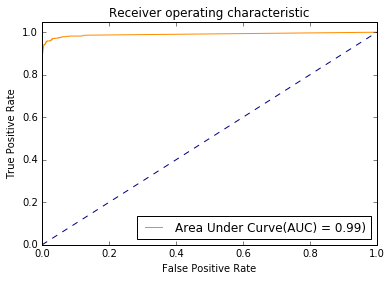

In [145]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0,2):
    fpr[i], tpr[i], _ = roc_curve(resultFrame["actual"], resultFrame["score"])
    roc_auc[i] = auc(fpr[i], tpr[i])

# fpr["micro"], tpr["micro"], _ = roc_curve(resultFrame["actual"].ravel(),  resultFrame["score"].ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 1
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='Area Under Curve(AUC) = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [149]:
resultFrame = pd.DataFrame()
result = pd.DataFrame(classifier.predict_proba(testData))
resultFrame["predicted"] = result.iloc[:,1]
resultFrame.index = Telabels.index
resultFrame["actual"] = Telabels
resultFrame["score"] = resultFrame["predicted"]
mask1 = resultFrame["predicted"]>0.3
mask = resultFrame["predicted"]<=0.3
resultFrame.ix[mask1,"predicted"] = 1
resultFrame.ix[mask,"predicted"] = 0
tn, fp, fn, tp = confusion_matrix(resultFrame["actual"],resultFrame["predicted"]).ravel()
misclassification = (fn+fp)/(tp+tn+fp+fn)
print(misclassification)

0.0088125


/Users/ashvant/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [150]:
print("True Positives : ",tp)
print("True Negatives : ",tn)
print("False Positives : ",fp)
print("False Negatives : ",fn)

True Positives :  305
True Negatives :  15554
False Positives :  71
False Negatives :  70


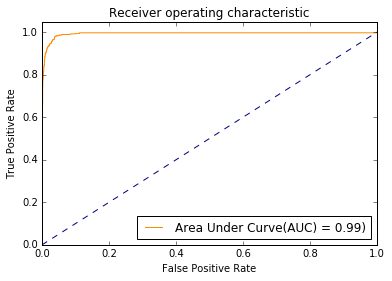

In [151]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(0,2):
    fpr[i], tpr[i], _ = roc_curve(resultFrame["actual"], resultFrame["score"])
    roc_auc[i] = auc(fpr[i], tpr[i])

# fpr["micro"], tpr["micro"], _ = roc_curve(resultFrame["actual"].ravel(),  resultFrame["score"].ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 1
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='Area Under Curve(AUC) = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

After altering the probability threshold form 0.5 to 0.3, there seems to be a better justification to the false negative to true positive ratio in both the training and the test data. Hence like resampling, thresholding also seems to have positive effect on handling the imbalance in the dataset.


(e) Model Trees
In the case of a univariate tree, only one input dimension is used at a tree split.
In a multivariate tree, or model tree, at a decision node all input dimensions can
be used and thus it is more general. In univariate classification trees, majority
polling is used at each node to determine the split of that node as the decision
rule. In model trees, a (linear) model that relies on all of the variables is used
to determine the split of that node (i.e. instead of using Xj > s as the decision
rule, one has P
j
βjXj > s. as the decision rule). Alternatively, in a regression
tree, instead of using average in the region associated with each node, a linear
regression model is used to determine the value associated with that node.
One of the methods that can be used at each node is Logistic Regression. One
can use scikit learn to call Weka to train Logistic Model Trees for classification.
Train Logistic Model Trees for the APS data set without compensation for class
imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods
to estimate the error of your trained model and compare it with the test error.
Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [31]:
import weka.core.jvm as jvm
jvm.start()

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


In [32]:
from weka.core.converters import Loader

In [34]:
testData.to_csv(path_or_buf="testDataSMOTE.csv",index=False)

In [35]:
Trlabels.to_csv(path_or_buf="trainLabelsSMOTE.csv",index=False)

In [36]:
Telabels.to_csv(path_or_buf="testLabelsSMOTE.csv",index=False)

In [103]:
Trlabels["class"]= Trlabels["class"].replace(0,"neg")
Telabels["class"]= Telabels["class"].replace(0,"neg")
Trlabels["class"]= Trlabels["class"].replace(1,"pos")
Telabels["class"]= Telabels["class"].replace(1,"pos")

trainData["class"] = Trlabels["class"]
testData["class"] = Telabels["class"]
trainData.to_csv(path_or_buf="trainDataLMT.csv",index=False)
testData.to_csv(path_or_buf="testDataLMT.csv",index=False)

In [104]:
import weka.core.converters as converters

In [105]:
trainDataLMT = converters.load_any_file("trainDataLMT.csv")
testDataLMT = converters.load_any_file("testDataLMT.csv")
trainDataSMOTE = converters.load_any_file("trainDataSMOTE.csv")
testDataSMOTE = converters.load_any_file("testDataSMOTE.csv")
TrlabelsSMOTE = converters.load_any_file("trainLabelsSMOTE.csv")
TelabelsSMOTE = converters.load_any_file("trainLabelsSMOTE.csv")

In [106]:
from weka.classifiers import Classifier

In [107]:
cls = Classifier(classname="weka.classifiers.trees.LMT")

In [108]:
trainDataLMT.class_is_last()

In [109]:
cls.build_classifier(trainDataLMT)

In [110]:
from weka.classifiers import Evaluation
from weka.core.classes import Random
evl = Evaluation(trainDataLMT)
evl.crossvalidate_model(cls, trainDataLMT, 5,Random(1))

In [111]:
print(evl.percent_correct)

99.17333333333333


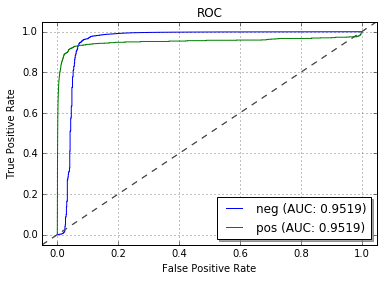

In [112]:
import weka.plot.classifiers as plcls  # NB: matplotlib is required
plcls.plot_roc(evl, class_index=[0, 1], wait=True)

In [113]:
testDataLMT.class_is_last()
evl = Evaluation(testDataLMT)
evl.test_model(cls,testDataLMT)
print(evl.summary())


Correctly Classified Instances       15837               98.9813 %
Incorrectly Classified Instances       163                1.0188 %
Kappa statistic                          0.7562
Mean absolute error                      0.0131
Root mean squared error                  0.0892
Relative absolute error                 28.6428 %
Root relative squared error             58.9352 %
Total Number of Instances            16000     



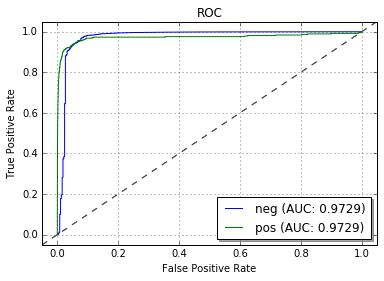

In [114]:
plcls.plot_roc(evl, class_index=[0, 1], wait=True)

The accuracy of the cross validated train data and test data are 99.17 and 98.9. This shows that the trained model has generalized pretty well but the AUC values of 0.95 on the train data suggest some imbalance in the dataset which we can try to overcome by oversampling using smote.

(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your
data to compensate for class imbalance. Train a Logistic Model Tree using the
pre-processed data and repeat 2e. Do not forget that there is a right and a wrong
way of cross validation here. Compare the uncompensated case with SMOTE.

In [64]:
from imblearn.over_sampling import SMOTE

In [81]:
# trainData =  trainData.drop(["class"],axis=1)
colnames = trainData.columns
Trlabels["class"]= Trlabels["class"].replace("neg",0)
Telabels["class"]= Telabels["class"].replace("neg",0)
Trlabels["class"]= Trlabels["class"].replace("pos",1)
Telabels["class"]= Telabels["class"].replace("pos",1)
smt = SMOTE(random_state=42)
modified_train_data, modified_train_labels = smt.fit_sample(trainData, Trlabels)

/Users/ashvant/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
print(len(modified_train_data))

118000


In [83]:
print(colnames)
modified_train = pd.DataFrame(modified_train_data,columns=colnames)

Index(['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000',
       'ag_001', 'ag_002', 'ag_003',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=170)


In [85]:
modified_test = pd.DataFrame(modified_train_labels,columns=["class"])

In [88]:

modified_test["class"]= modified_test["class"].replace(0,"neg")
Telabels["class"]= Telabels["class"].replace(0,"neg")
modified_test["class"]= modified_test["class"].replace(1,"pos")
Telabels["class"]= Telabels["class"].replace(1,"pos")
modified_train["class"] = modified_test["class"]

In [89]:
modified_train.to_csv(path_or_buf="trainDataSMOTE.csv",index=False)

In [101]:
trainDataSMOTE = converters.load_any_file("trainDataSMOTE.csv")
testDataSMOTE = converters.load_any_file("testDataLMT.csv")

98.57881355932203


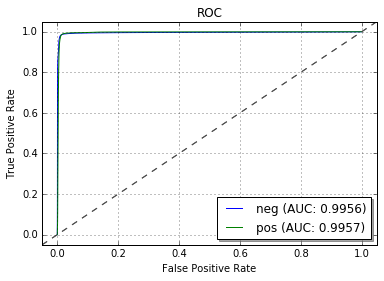

In [92]:
cls = Classifier(classname="weka.classifiers.trees.LMT")
trainDataSMOTE.class_is_last()
cls.build_classifier(trainDataSMOTE)
evl = Evaluation(trainDataSMOTE)
evl.crossvalidate_model(cls, trainDataSMOTE, 5,Random(1))
print(evl.percent_correct)
plcls.plot_roc(evl, class_index=[0, 1], wait=True)


Correctly Classified Instances       15590               97.4375 %
Incorrectly Classified Instances       410                2.5625 %
Kappa statistic                          0.6154
Mean absolute error                      0.0351
Root mean squared error                  0.1434
Relative absolute error                 76.6135 %
Root relative squared error             94.7638 %
Total Number of Instances            16000     



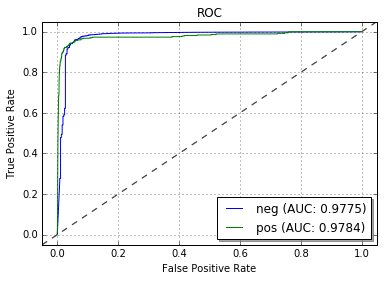

In [102]:
testDataSMOTE.class_is_last()
evl = Evaluation(testDataSMOTE)
evl.test_model(cls,testDataSMOTE)
print(evl.summary())
plcls.plot_roc(evl, class_index=[0, 1], wait=True)

The test AUC values have prominently raised form .95 to .99 which suggest that SMOTE has considerably oversampled the data well to reduce the error due to imbalance. HEnce the oversampling SMOTE employed to LMT in this scenario has seemed to work well as a measure to tackle imbalance. Cross validation has been done on the oversampled data to estimate the test error.